In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import files
uploaded = files.upload()

Saving lending_club_loan_two.csv to lending_club_loan_two.csv


In [0]:
df = pd.read_csv('lending_club_loan_two.csv')

In [0]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [0]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [0]:
df['grade'].unique()
#drop

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [0]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [0]:
#drop emp_title

In [0]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [0]:
df['home_ownership'].unique()
#drop

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [0]:
df['verification_status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [0]:
#drop issue_d

In [0]:
df['purpose'].unique()
#drop

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [0]:
#drop earliest_cr_line

In [0]:
df['open_acc'].unique()

array([16., 17., 13.,  6.,  8., 11.,  5., 30.,  9., 15., 12., 10., 18.,
        7.,  4., 14., 20., 19., 21., 23.,  3., 26., 42., 22., 25., 28.,
        2., 34., 24., 27., 31., 32., 33.,  1., 29., 36., 40., 35., 37.,
       41., 44., 39., 49., 48., 38., 51., 50., 43., 46.,  0., 47., 57.,
       53., 58., 52., 54., 45., 90., 56., 55., 76.])

In [0]:
#drop initial list status

In [0]:
df = df.drop('grade',axis=1)

In [0]:
df = df.drop('emp_title',axis=1)

In [0]:
df = df.drop('home_ownership',axis=1)

In [0]:
df = df.drop('issue_d',axis=1)

In [0]:
df = df.drop('purpose',axis=1)

In [0]:
df = df.drop('earliest_cr_line',axis=1)

In [0]:
df = df.drop('initial_list_status',axis=1)

In [0]:
df = df.drop('address',axis=1)

In [0]:
df = df.drop('title',axis=1)

In [0]:
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,verification_status,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36 months,11.44,329.48,B4,10+ years,117000.0,Not Verified,Fully Paid,26.24,16.0,0.0,36369.0,41.8,25.0,INDIVIDUAL,0.0,0.0
1,8000.0,36 months,11.99,265.68,B5,4 years,65000.0,Not Verified,Fully Paid,22.05,17.0,0.0,20131.0,53.3,27.0,INDIVIDUAL,3.0,0.0
2,15600.0,36 months,10.49,506.97,B3,< 1 year,43057.0,Source Verified,Fully Paid,12.79,13.0,0.0,11987.0,92.2,26.0,INDIVIDUAL,0.0,0.0
3,7200.0,36 months,6.49,220.65,A2,6 years,54000.0,Not Verified,Fully Paid,2.60,6.0,0.0,5472.0,21.5,13.0,INDIVIDUAL,0.0,0.0
4,24375.0,60 months,17.27,609.33,C5,9 years,55000.0,Verified,Charged Off,33.95,13.0,0.0,24584.0,69.8,43.0,INDIVIDUAL,1.0,0.0


In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
le = LabelEncoder()

In [0]:
df['Term'] = le.fit_transform(df.term)

In [0]:
df = df.drop('term',axis=1)

In [0]:
df['Sub_grade'] = le.fit_transform(df.sub_grade)

In [0]:
df = df.drop('sub_grade',axis=1)

In [0]:
df = df.drop('emp_length',axis=1)

In [0]:
df['Verification_status'] = le.fit_transform(df.verification_status)

In [0]:
df = df.drop('verification_status',axis=1)

In [0]:
df['Loan_status'] = le.fit_transform(df.loan_status)

In [0]:
df = df.drop('loan_status',axis=1)

In [0]:
df['Application_type'] = le.fit_transform(df.application_type)

In [0]:
df = df.drop('application_type',axis=1)

In [0]:
df.head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,Term,Sub_grade,Verification_status,Loan_status,Application_type
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,0,8,0,1,1
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,0,9,0,1,1
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,0,7,1,1,1
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,0,1,0,1,1
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,1,14,2,0,1


In [0]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [0]:
df = df.fillna(df.mean())

In [0]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,396030.0,53.791749,24.443671,0.00,35.90,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [0]:
X = df.drop('Loan_status',axis=1).values
y = df['Loan_status'].values

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.2, random_state=101)

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [0]:
X_train = scaler.fit_transform(X_train)

In [0]:
X_test = scaler.transform(X_test)

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [0]:
X_train.shape

(316824, 16)

In [0]:
X_test.shape

(79206, 16)

In [0]:
model = Sequential()

model.add(Dense(78, activation = 'relu'))

model.add(Dense(39, activation = 'relu'))

model.add(Dense(19, activation = 'relu'))

# BINARY CLASSIFICATION
model.add(Dense(1, activation = 'relu'))

model.compile(loss='mse', optimizer='adam')

In [0]:
model.fit(x=X_train,y=y_train, epochs=100, validation_data=(X_test,y_test), batch_size=256)

Epoch 1/100
1238/1238 [==============================] - 3s 2ms/step - loss: 0.1500 - val_loss: 0.1449
Epoch 2/100
1238/1238 [==============================] - 2s 2ms/step - loss: 0.1450 - val_loss: 0.1444
Epoch 3/100
1238/1238 [==============================] - 2s 2ms/step - loss: 0.1446 - val_loss: 0.1440
Epoch 4/100
1238/1238 [==============================] - 2s 2ms/step - loss: 0.1443 - val_loss: 0.1436
Epoch 5/100
1238/1238 [==============================] - 2s 2ms/step - loss: 0.1441 - val_loss: 0.1435
Epoch 6/100
1238/1238 [==============================] - 2s 2ms/step - loss: 0.1437 - val_loss: 0.1432
Epoch 7/100
1238/1238 [==============================] - 2s 2ms/step - loss: 0.1435 - val_loss: 0.1431
Epoch 8/100
1238/1238 [==============================] - 2s 2ms/step - loss: 0.1433 - val_loss: 0.1434
Epoch 9/100
1238/1238 [==============================] - 2s 2ms/step - loss: 0.1431 - val_loss: 0.1433
Epoch 10/100
1238/1238 [==============================] - 2s 2ms/step - l

In [0]:
z = pd.DataFrame(model.history.history)

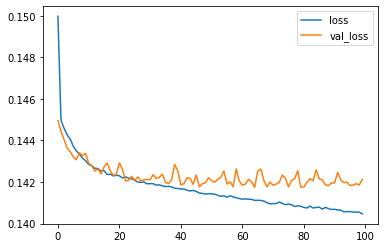

In [0]:
z.plot()

In [0]:
from tensorflow.keras.models import load_model

In [0]:
model.save('loanmodel.h5')

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [0]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.52      0.10      0.17     15493
           1       0.82      0.98      0.89     63713

    accuracy                           0.81     79206
   macro avg       0.67      0.54      0.53     79206
weighted avg       0.76      0.81      0.75     79206



In [0]:
df['Loan_status'].value_counts()

1    318357
0     77673
Name: Loan_status, dtype: int64

In [0]:
confusion_matrix(y_test,predictions)

array([[ 1561, 13932],
       [ 1425, 62288]])

In [0]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('Loan_status',axis=1).iloc[random_ind]
new_customer

loan_amnt               24000.00
int_rate                   13.11
installment               547.43
annual_inc              85000.00
dti                        10.98
open_acc                    6.00
pub_rec                     0.00
revol_bal               35464.00
revol_util                 66.80
total_acc                  29.00
mort_acc                    8.00
pub_rec_bankruptcies        0.00
Term                        1.00
Sub_grade                   8.00
Verification_status         1.00
Application_type            1.00
Name: 304691, dtype: float64

In [0]:
new_customer = scaler.transform(new_customer.values.reshape(1,16))

In [0]:
model.predict_classes(new_customer)

array([[1]], dtype=int32)

In [0]:
df.iloc[random_ind]['Loan_status']

1.0